In [18]:
import json

timeline = []
with open('./2022_W1_NYJ_BLT_TS.json', 'r') as source_file:
    timeline = json.loads(source_file.read())

In [19]:
timeline

[{'event': 1,
  'quarter': '1st Quarter',
  'time': '15:00',
  'sequence': [{'side': 'BLT', 'at': 35},
   {'side': 'NYJ', 'at': -3},
   {'side': 'NYJ', 'at': 22}],
  'info': [],
  'events': ['KO'],
  'formations': [],
  'players': ['J.Ross', 'J.Tucker', 'B.Berrios']},
 {'event': 2,
  'quarter': '1st Quarter',
  'time': '14:55',
  'sequence': [{'side': 'NYJ', 'at': 41}],
  'info': [],
  'events': [],
  'formations': [],
  'players': ['Mi.Carter', 'C.Clark', 'M.Williams']},
 {'event': 2,
  'quarter': '1st Quarter',
  'time': '14:55',
  'sequence': [{'side': 'NYJ', 'at': 41}],
  'info': [],
  'events': [],
  'formations': ['SHOTGUN'],
  'players': ['Mi.Carter', 'J.Flacco']},
 {'event': 3,
  'quarter': '1st Quarter',
  'time': '14:18',
  'sequence': [{'side': 'NYJ', 'at': 46}],
  'info': [],
  'events': [],
  'formations': ['SHOTGUN', 'NO HUDDLE'],
  'players': ['Mi.Carter', 'M.Harrison']},
 {'event': 4,
  'quarter': '1st Quarter',
  'time': '14:01',
  'sequence': [{'side': 'NYJ', 'at': 46

In [8]:
datasets = {
    '1st Quarter': [],
    '2nd Quarter': [],
    '3rd Quarter': [],
    '4th Quarter': [],
    'Overtime': []
}

for record in timeline:
    datasets[record['period']].append(record)

In [9]:
figsize = (25, 15)

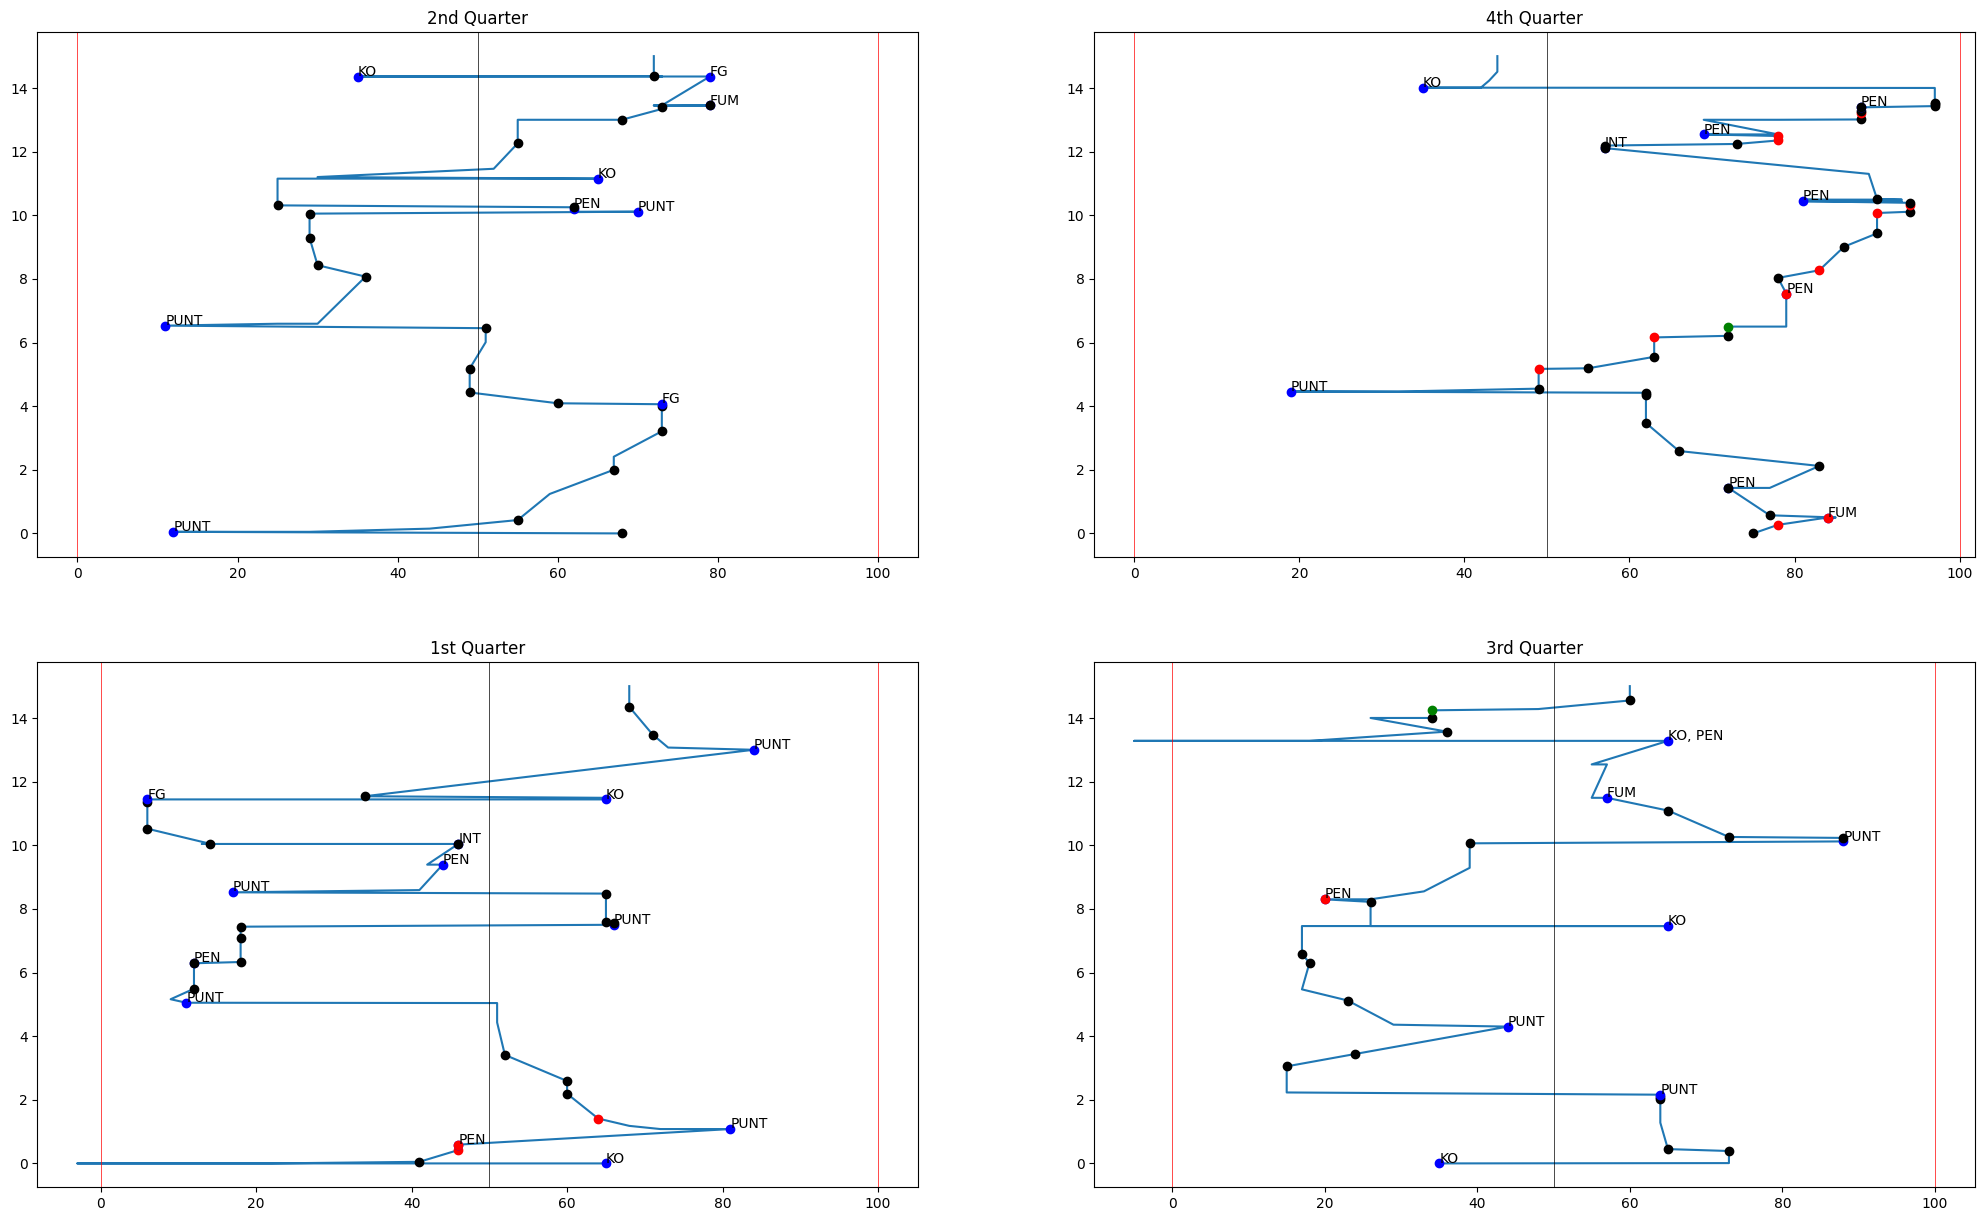

In [10]:
import matplotlib.pyplot as plt

r = 1
c = 0

fig, axs = plt.subplots(2, 2, figsize=figsize)

for key, items in datasets.items():
    if len(items) == 0:
        continue

    ax = axs[r][c]

    ax.set_title(key)

    X, y = [], []
    for record in items:
        for spot in record['spots']:
            X.append(record['time'])
            y.append(spot['at'])

    ax.plot(y, X, label='yards')

    for record in items:
        events = set(record['events'])
        for spot in record['spots'][:1]:
            x = record['time']
            y = spot['at']

            if len(events) > 0:
                color = 'blue'

                annotations = []
                if 'TOUCHDOWN' in events:
                    annotations.append('TD')
                if 'FIELD GOAL' in events:
                    annotations.append('FG')
                if 'NEG-FIELD GOAL' in events:
                    annotations.append('MFG')
                if 'PUNT' in events:
                    annotations.append('PUNT')
                if 'KICKOFF' in events:
                    annotations.append('KO')
                if 'PENALTY' in events:
                    annotations.append('PEN')
                if 'INTERCEPTION' in events:
                    annotations.append('INT')
                if 'FUMBLE' in events:
                    annotations.append('FUM')

                ax.plot(y, x, 'o', c='blue', label='EVENT')
                ax.annotate(', '.join(annotations), (y, x+.03))

            formations = set(record['formations'])
            if len(formations) > 0:
                if 'SHOTGUN' in formations and 'NO HUDDLE' in formations:
                    ax.plot(y, x, 'o', c='red', label='NO HUDDLE / SHOTGUN')
                elif 'NO HUDDLE' in formations:
                    ax.plot(y, x, 'o', c='green', label='NO HUDDLE')
                elif 'SHOTGUN' in formations:
                    ax.plot(y, x, 'o', c='black', label='SHOTGUN')

    ax.axvline(0, color='r', linewidth=.5, linestyle='-')
    ax.axvline(50, color='k', linewidth=.5, linestyle='-')
    ax.axvline(100, color='r', linewidth=.5, linestyle='-')

    r -= 1
    if r < 0:
        r = 1
        c += 1

plt.show()